In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from functions import *


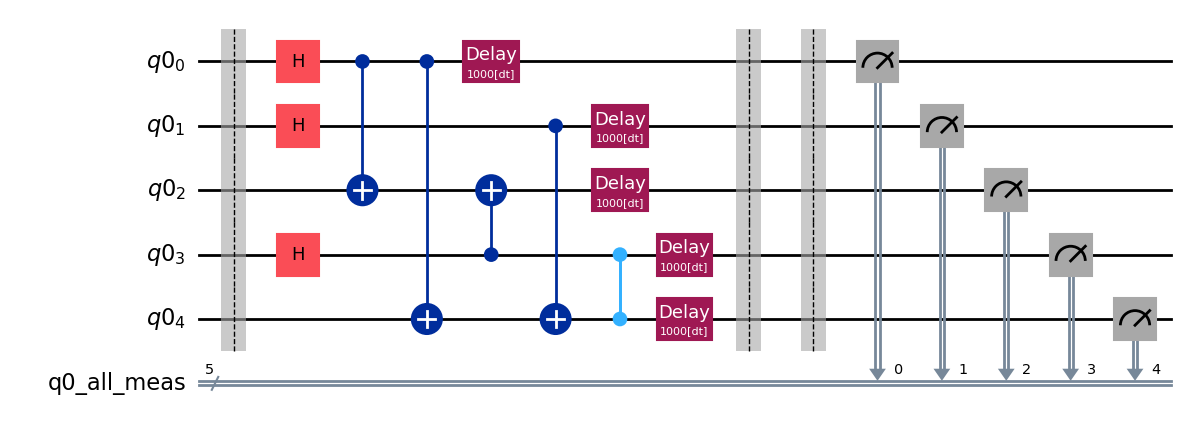

In [4]:


def load_circuit(delay):
    qc = FiveQbPerfectCodeCircuit(1)

    qc.encode(type='0')
    
    qc.delay(delay)
    
    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [5]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_sherbrooke")

In [6]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 7
Transpiled Circuit Depth: 32


In [7]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [8]:
# t_array = [2_500, 5_000, 10_000, 20_000, 80_000, 160_000, 320_000]
# t_array = range(0, 21)
# t_array = [t*10_000 for t in t_array]
# t_array = [t*4_000 for t in range(0, 6)]
# t_array = [t*9_000 for t in range(0, 6)]
t_array = [t*90_000 for t in range(0, 5)]
print([round(t*dt * 10**(-3), 3) for t in t_array])


[0.0, 20.0, 40.0, 60.0, 80.0]


In [9]:
# circuits = []

# # initial_layout = get_layout(isa_circuit, qb_len=5)

# for t in t_array:

#     qc = load_circuit(t)

#     isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=100, scheduling_method="asap", optimization_level=3,
#                                 # initial_layout=[41, 42, 40, 53, 43]
#                                 )
#     circuits.append(isa_circuit)

#     print(f"Circuit Depth: {circuits[-1].depth()}")
#     print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
#     print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")
#     print(get_layout(circuits[-1], qb_len=5))
#     print('\n')
#     # c.draw(output='mpl')

In [10]:

simulation_result = sampler_simulation(qc.physical_circuit, 3200)
extract_simulation_results([simulation_result], type='percentage')
        


{'q0_all_meas': [{'00000': 11.71875,
   '00001': 0.0,
   '00010': 0.0,
   '00011': 0.0,
   '00100': 0.0,
   '00101': 0.0,
   '00110': 12.625,
   '00111': 0.0,
   '01000': 0.0,
   '01001': 12.812499999999998,
   '01010': 0.0,
   '01011': 0.0,
   '01100': 0.0,
   '01101': 0.0,
   '01110': 0.0,
   '01111': 11.59375,
   '10000': 0.0,
   '10001': 0.0,
   '10010': 0.0,
   '10011': 12.937499999999998,
   '10100': 0.0,
   '10101': 13.53125,
   '10110': 0.0,
   '10111': 0.0,
   '11000': 0.0,
   '11001': 0.0,
   '11010': 13.1875,
   '11011': 0.0,
   '11100': 11.59375,
   '11101': 0.0,
   '11110': 0.0,
   '11111': 0.0}]}

In [11]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
# job = service.job('cxjt95m6t010008d022g') # t_array = [2_500, 5_000, 10_000, 20_000, 80_000, 160_000, 320_000]
# job = service.job('cxjyfyf6t010008d0gyg') # brisbane iteracion 1
# job = service.job('cxmyxddky7rg0084g4m0') # brisbane iteracion 2  <----
# job = service.job('cxmzj08ky7rg0084g600') # brisbane con qubits fijos en el transpile
# job = service.job('cyhbdnycw2k000895gf0') # shots = 3200, t_array = [t*4_000 for t in range(0, 6)]
# job = service.job('cykw2p2rta1g008vyny0') # kyiv, t_array = [t*9_000 for t in range(0, 6)]
job = service.job('cz4z4hj10wx0008bhzwg') # sherbrooke, t_array = [t*90_000 for t in range(0, 5)]
# job = service.job('cz4ze0g10wx0008bj1t0') # iteracion 2
# job = service.job('cz5010mh0kc00088z7y0') # iteracion 3

pub_result = job.result()


In [12]:
results = extract_results_IBM(pub_result, type='percentage')['q0_all_meas']

states = get_possible_states(5)
valid_states = [
    '00000',
    '11100',
    '11010',
    '00110',
    '01001',
    '10101',
    '10011',
    '01111'
]


In [13]:

delays = [round(t*dt/1000) for t in t_array]

In [14]:
# for id in ['cz4z4hj10wx0008bhzwg', 'cz4ze0g10wx0008bj1t0', 'cz5010mh0kc00088z7y0']:
#     results = extract_results_IBM(service.job(id).result(), type='percentage')['q0_all_meas']
#     for i in range(len(results)):
#         print(delays[i], ':', round(calculate_tvd(results[i], generate_uniform_distribution(5, valid_states), percentage=True)*100,2))
#     print('\n')

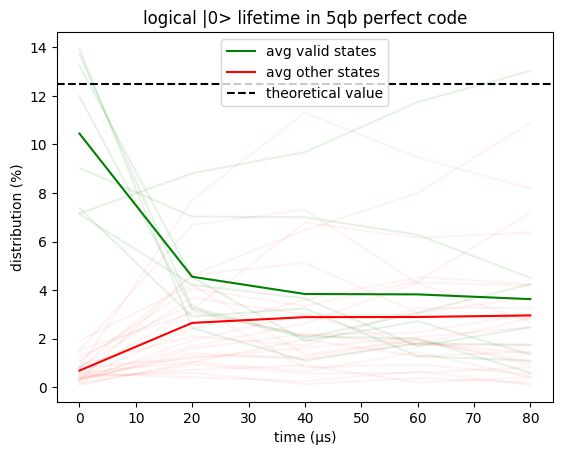

In [15]:
import matplotlib.pyplot as plt
import math


# possible_valid_states = []
# x = [math.log(d) for d in delays]
x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]
    
    # if y[s][0] > 5:
        # possible_valid_states.append(s)
    if s in valid_states:
        # if s == '00000':
        #     plt.plot(x, y[s], alpha=0.2, color='black')
        #     continue
        plt.plot(x, y[s], alpha=0.1, color='green')
    else:
        plt.plot(x, y[s], alpha=0.05, color='red')


plt.plot(x, [sum([r[s] for s in valid_states])/8 for r in results], label='avg valid states', color='green')
# plt.plot(x, [sum([r[s] for s in possible_valid_states if s != '00000'])/7 for r in results], label='avg valid states', color='black')
plt.plot(x, [sum([r[s] for s in states if s not in valid_states])/24 for r in results], label='avg other states', color='red')

plt.axhline(y=100/8, color='k', linestyle='--', label='theoretical value')
    
# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |0> lifetime in 5qb perfect code')
plt.legend()

# Display the plot
plt.show()

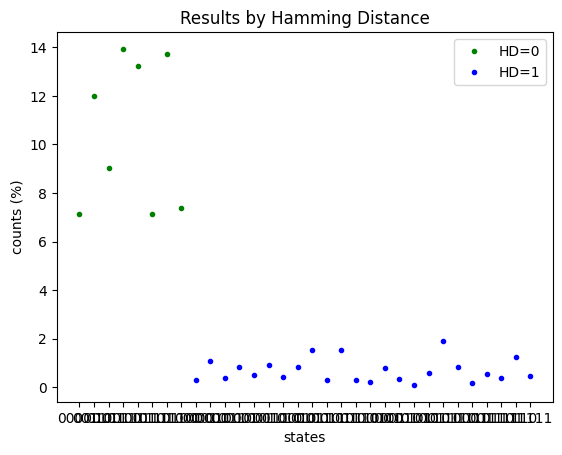

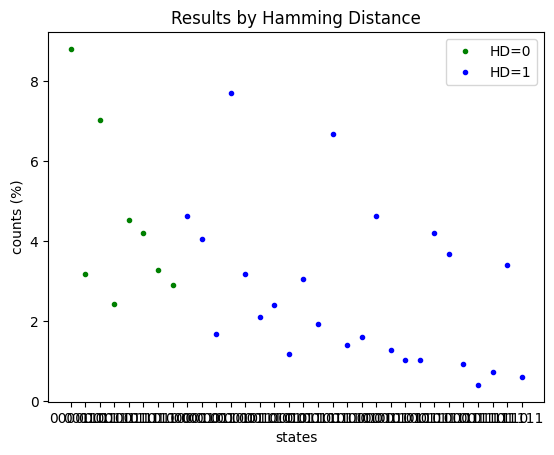

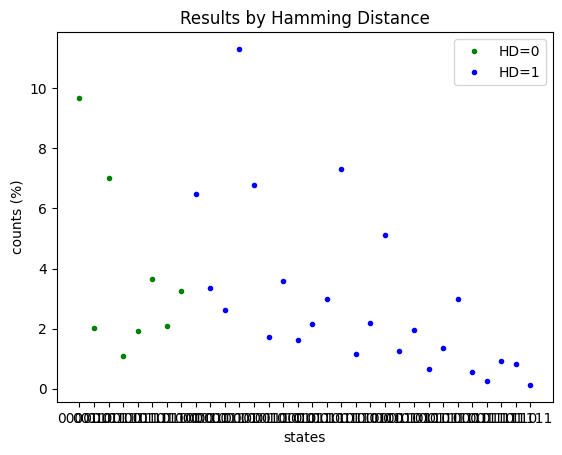

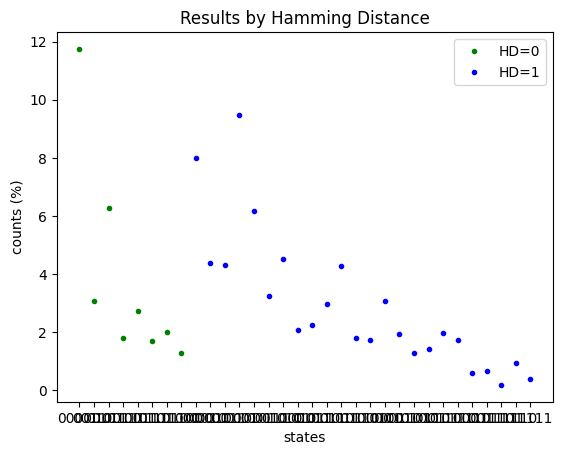

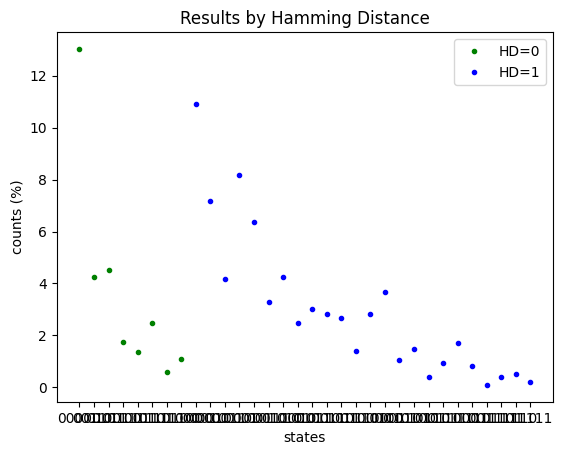

In [16]:
for r in results:
    plot_results_hamming_distance(r, qb_len=5, valid_states=valid_states)

TVD

In [17]:
alpha = generate_uniform_distribution(5, valid_states)


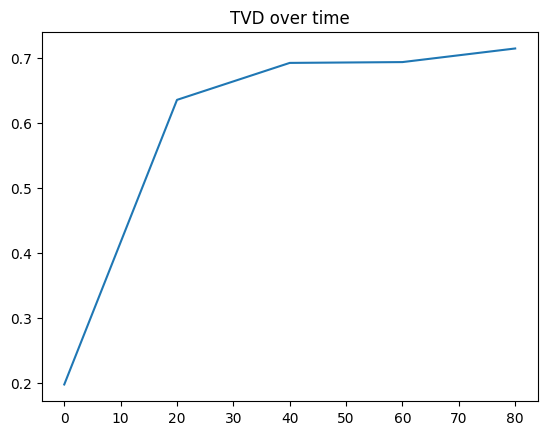

In [18]:
tvd = [calculate_tvd(r, alpha) for r in results]
simple_plot(x, tvd, title="TVD over time")

In [19]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 19.81%


In [20]:

for i in range(len(results)):
    print(delays[i], ':', round(calculate_tvd(results[i], alpha, percentage=True)*100,2))

0 : 19.81
20 : 63.59
40 : 69.28
60 : 69.41
80 : 71.5


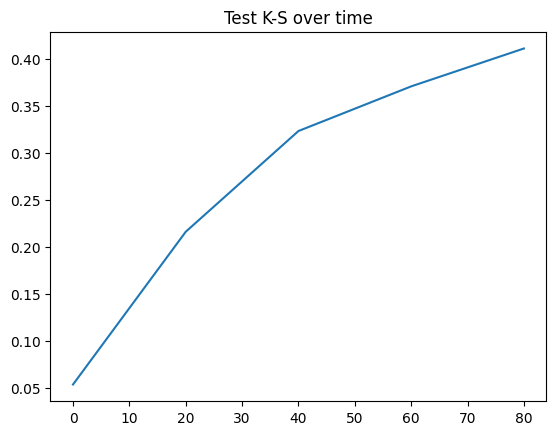

In [21]:
ks = [calculate_test_ks(r, alpha) for r in results]
simple_plot(x, ks, title="Test K-S over time")

In [22]:
print(f"best KS: {round(min(ks)*100,2)}%")

best KS: 5.34%


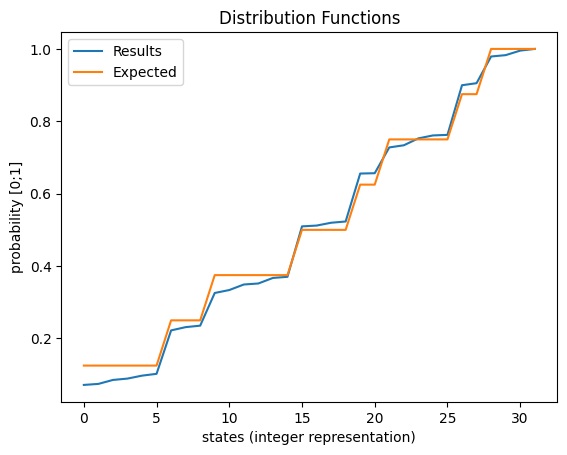

In [23]:
plot_distribution_functions(results[0], alpha)